# <center>Лабораторна робота № 2.<br> Аналіз даних про пасажирів лайнеру "Титанік"</center>

**В завданні пропонується за допомогою Pandas відповісти на декілька питань за даними репозиторія Kaggle (https://www.kaggle.com/c/titanic/data) (качати дані не потрібно – вони вже є в директорії роботи).**


In [109]:
import numpy as np
import pandas as pd
%matplotlib inline

In [110]:
data_folder = "data" 

**Зчитати дані з файлу в пам'ять у вигляді об'єкта Pandas.DataFrame**

In [111]:
data = pd.read_csv(data_folder + '/titanic_train.csv', index_col='PassengerId')

**Доступ до даних на google drive**, якщо ви відкриваєте блокнот в **google colab**, а не на PC, можна отримати шляхом монтування google drive

In [112]:
# from google.colab import drive
# drive.mount('/content/gdrive') 

In [113]:
# !ls gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_1_2/data	

In [114]:
# шлях до папки з даними на моєму google drive, відредагуйте згідно вашого випадку
# data_folder = "gdrive/My Drive/TEACHING/IntroDataScience/intro_to_data_science/Lab_1_2/data" 

In [115]:
#data = pd.read_csv('data/titanic_train.csv', index_col='PassengerId')
data = pd.read_csv(data_folder+'/titanic_train.csv', index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимося на перші 5 рядків:**

In [116]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200$ за білет (fare > 200).**

Переконайтеся, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться як обчислюється вираз в квадратних дужках.

In [118]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей за зменшенням плати за білет.**

In [119]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення ознаки.**

In [120]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [121]:
age_categories = [age_category(age) for age in data.Age]

In [122]:
data['Age_category'] = age_categories

**Інший спосіб – через `apply`.**

In [123]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок знаходилося на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок

In [124]:
gender_distribution = data['Sex'].value_counts()
print("Кількість чоловіків / жінок на борту:\n", gender_distribution)

Кількість чоловіків / жінок на борту:
 Sex
male      577
female    314
Name: count, dtype: int64


**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей же розподіл, тілько для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?**
- 104
- 108
- 112
- 125

In [125]:
# Розподіл Pclass
pclass_distribution = data['Pclass'].value_counts()
print("Розподіл Pclass:\n", pclass_distribution)

# Розподіл Pclass для чоловіків
pclass_distribution_men = data[data['Sex'] == 'male']['Pclass'].value_counts()
print("\nРозподіл Pclass для чоловіків:\n", pclass_distribution_men)

# Розподіл Pclass для жінок
pclass_distribution_women = data[data['Sex'] == 'female']['Pclass'].value_counts()
print("\nРозподіл Pclass для жінок:\n", pclass_distribution_women)

# Кількість чоловіків у 2-му класі
men_in_2nd_class = pclass_distribution_men[2]
print("\nКількість чоловіків у 2-му класі:", men_in_2nd_class)

Розподіл Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Розподіл Pclass для чоловіків:
 Pclass
3    347
1    122
2    108
Name: count, dtype: int64

Розподіл Pclass для жінок:
 Pclass
3    144
1     94
2     76
Name: count, dtype: int64

Кількість чоловіків у 2-му класі: 108


**3. Які значення медіани і стандартного відхилення платежів (`Fare`)? Виконайте округлення до 2 десяткових знаків.**
- Медіана – 14.45, стандартне відхилення – 49.69
- Медіана – 15.1,  стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [126]:
fare_median = round(data['Fare'].median(), 2)
fare_std = round(data['Fare'].std(), 2)

print(f"Медіана: {fare_median}, Стандартне відхилення: {fare_std}")

Медіана: 14.45, Стандартне відхилення: 49.69


**4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [127]:
# Визначаємо вікові групи
young_age_group = data[data['Age'] < 30]
old_age_group = data[data['Age'] > 60]

# Обчислюємо частки виживших
young_survival_rate = young_age_group['Survived'].mean() * 100
old_survival_rate = old_age_group['Survived'].mean() * 100

print(f"Частка виживших серед молодих (< 30 років): {young_survival_rate:.2f}%")
print(f"Частка виживших серед старих (> 60 років): {old_survival_rate:.2f}%")

Частка виживших серед молодих (< 30 років): 40.62%
Частка виживших серед старих (> 60 років): 22.73%


**5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок

In [129]:
# Обчислюємо частки виживших для чоловіків та жінок
survival_rate_men = data[data['Sex'] == 'male']['Survived'].mean() * 100
survival_rate_women = data[data['Sex'] == 'female']['Survived'].mean() * 100

print(f"Частка виживших серед чоловіків: {survival_rate_men:.2f}%")
print(f"Частка виживших серед жінок: {survival_rate_women:.2f}%")

Частка виживших серед чоловіків: 18.89%
Частка виживших серед жінок: 74.20%


**6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі**
- Charles
- Thomas
- William
- John

In [145]:
# Витягуємо імена з колонки 'Name' для пасажирів чоловічої статі
male_names = data[data['Sex'] == 'male']['Name'].str.extract(r'\w+, (?:Mr|Master|Rev|Dr|Major|Col|Don|Sir|Capt)\. ([A-Za-z]+)', expand=False)

# Рахуємо кількість кожного імені
name_counts = male_names.value_counts()

# Виводимо найбільш популярні імена
print("Найбільш популярні імена серед пасажирів Титаніку чоловічої статі:\n", name_counts.head())

Найбільш популярні імена серед пасажирів Титаніку чоловічої статі:
 Name
William    35
John       24
George     14
Charles    13
Thomas     13
Name: count, dtype: int64


**7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?**
- Так 
- Ні

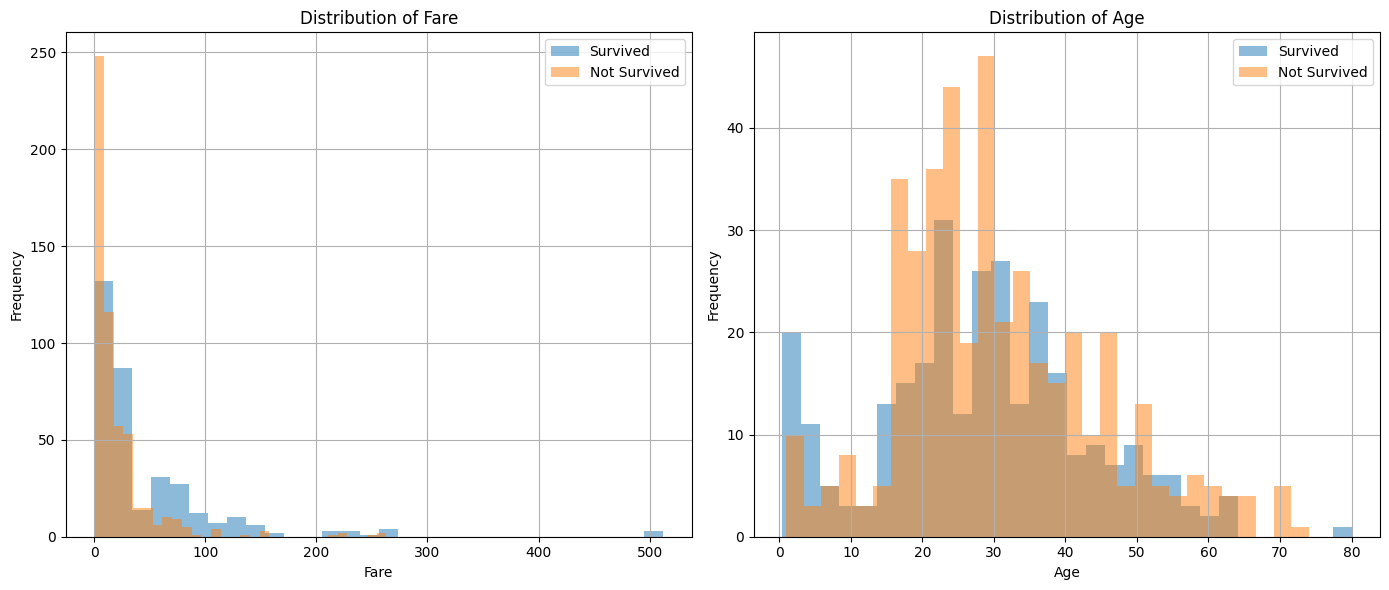

Середній вік врятованих: 28.34
Середній вік загиблих: 30.63


In [144]:
import matplotlib.pyplot as plt

# Побудова розподілу вартості білетів для врятованих та загиблих
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
data[data['Survived'] == 1]['Fare'].hist(bins=30, alpha=0.5, label='Survived')
data[data['Survived'] == 0]['Fare'].hist(bins=30, alpha=0.5, label='Not Survived')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')

# Побудова розподілу віку для врятованих та загиблих
plt.subplot(1, 2, 2)
data[data['Survived'] == 1]['Age'].hist(bins=30, alpha=0.5, label='Survived')
data[data['Survived'] == 0]['Age'].hist(bins=30, alpha=0.5, label='Not Survived')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

# Обчислення та виведення середнього віку врятованих та загиблих
mean_age_survived = data[data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = data[data['Survived'] == 0]['Age'].mean()

print(f"Середній вік врятованих: {mean_age_survived:.2f}")
print(f"Середній вік загиблих: {mean_age_not_survived:.2f}")

**8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування? Оберіть правильні твердження:**
- В середньому чоловіки 1-го класу старші 40 років
- В середньому жінки 1-го класу старші 40 років
- Чоловіки всіх класів в середньому старші жінок того ж класу
- В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу

In [146]:
# Групуємо за Pclass та Sex, щоб обчислити середній вік
mean_age_by_class_and_sex = data.groupby(['Pclass', 'Sex'])['Age'].mean()

print("Середній вік чоловіків / жінок в залежності від класу обслуговування:\n", mean_age_by_class_and_sex)

Середній вік чоловіків / жінок в залежності від класу обслуговування:
 Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
